In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from scipy.linalg import toeplitz

#The Generalized Regression Model

The generalized regression model can nbe written

\begin{equation}
Y= X\beta + \epsilon,
\end{equation}

where $E(\epsilon) = 0$ and $E(\epsilon\epsilon') = \sigma^2_n\Omega$. Here, the symmetric variance-covariance matrix ($n \times n$ and symmetric) for $\epsilon$ might be something like:

\begin{multline}
Var[\epsilon] = E[\epsilon'\epsilon]
=
\begin{pmatrix}
Var[\epsilon_1] & Cov[\epsilon_2, \epsilon_1] & \dots &  Cov[\epsilon_n,\epsilon_1]\\
Cov[\epsilon_1, \epsilon_2] & Var[\epsilon_2] & \dots & Cov[\epsilon_n,\epsilon_2] \\
\vdots                       &    \vdots       &      & \vdots\\
Cov[\epsilon_1, \epsilon_n]  & Cov[\epsilon_2, \epsilon_n] & \dots & Var[\epsilon_n] \\
\end{pmatrix}\\
= \begin{pmatrix}
\sigma^2_1 & \rho_{1,2} & \dots & \rho_{1, n-1} &  \rho_{1,n}\\
\rho_{2,1} & \sigma^2_2 & \dots & \rho_{2,n-1} & \rho_{2,n} \\
\vdots                       &    \vdots       &    \vdots  & \vdots & \vdots\\
\rho_{n-1,1}& \rho_{n-1,2} & \dots & \sigma^2_{n-1} & \rho_{n-1,n}\\
\rho_{n,1}  & \rho_{n,2} & \dots &\rho_{n, n-1} & \sigma^2_n \\
\end{pmatrix} = \sigma^2_n\Omega
\end{multline}

Recall that we assumed the following when proving the OLS estimator is BLUE.

\begin{multline}
Var[\epsilon] = E[\epsilon'\epsilon]
=
\begin{pmatrix}
Var[\epsilon_1] & Cov[\epsilon_2, \epsilon_1] & \dots &  Cov[\epsilon_n,\epsilon_1]\\
Cov[\epsilon_1, \epsilon_2] & Var[\epsilon_2] & \dots & Cov[\epsilon_n,\epsilon_2] \\
\vdots                       &    \vdots       &      & \vdots\\
Cov[\epsilon_1, \epsilon_n]  & Cov[\epsilon_2, \epsilon_n] & \dots & Var[\epsilon_n] \\
\end{pmatrix}\\
= \begin{pmatrix}
\sigma^2 & 0 & \dots &  0\\
0 & \sigma^2 & \dots & 0 \\
\vdots                       &    \vdots       &      & \vdots\\
0  & 0 & \dots & \sigma^2 \\
\end{pmatrix} = \sigma^2I_n
\end{multline}

##Properties of the OLS Estimator

Here we consider the properties of the OLS estimator in the presence of heteroscedasticity and/or autocorrelation. Note that the presence of these issues might be more likely when working with different types of data, e.g., autocorrelation is more likely to occur with time series data while heterosedasticity is more common with cross-sectional data. There are also often theoretical reasons that motivate expectations about autocorrelation or heteroskedasticity in the data.

####Mean of the OLS Estimator under the Generalized Regression Model

\begin{equation}
b = (X'X)^{-1}X'Y = (X'X)^{-1}(X'(X\beta + \epsilon)) = \beta + (X'X)^{-1}X'\epsilon
\end{equation}

So, $E(b) = \beta$ if the $X$ values are fixed in repeated sampling or if $COV(X,\epsilon) = 0$. So the $b$ is an unbiased estimate of $\beta$. However, issues like simultaneity and other types of **endogeneity** are still problematic under generalized regression.

\begin{align}
VAR(b)_{k \times k}
&= E\left[(b-\beta)(b-\beta)'\right]  \\
&= E\left[(X'X)^{-1}X'\epsilon\epsilon'X(X'X)^{-1}\right] \\
&= (X'X)^{-1}X'\sigma^2\Omega X(X'X)^{-1}.
\end{align}

If, in addition, $\epsilon \sim N$ then

\begin{equation}
b \sim N\left[\beta, (X'X)^{-1}X'\sigma^2\Omega X(X'X)^{-1}\right].
\end{equation}

##Efficient Estimation under Generalized Regression

Our goal is to find an **efficient estimator** (the smallest variance esimator among unbiased estimators) of $\beta$ given $\Omega$. If we note $\Omega$ is symmetric, and pre- and post-multiply $\Omega$ by $P = \Lambda^{-1/2}C'$ where $\Lambda$ is a diagonal matrix with all the eigenvalues of $\Omega$ along the main diagonal, and $C$ is a matrix of characteristic vectors, we have

\begin{equation}
P\Omega P' = I.
\end{equation}

Then using matrix algebra, we have $\Omega^{-1} = P'P$.

Let's pre-multiply the population regression equation by $P$:

\begin{equation}
PY = PX\beta + P\epsilon.
\end{equation}

Now define $Y_* = PY,\;X_* = PX$, and $\epsilon_* = P\epsilon$. Then the model is

\begin{equation}
Y_* = X_*\beta + \epsilon_*
\end{equation}

where $\epsilon_* = P\epsilon \sim iid(0, P\sigma^2\Omega P' = \sigma^2I)$. Now the classical assumoption of OLS are satesfied by GLS, and

\begin{align}
b_{GLS} &= (X_*'X_*)^{-1}(X_*'Y_*')\\
&= (X_*'P'PX_*)^{-1}(X_*'P'PY_*')\\
&= (X_*'\Omega^{-1} X_*)(X_*'\Omega^{-1} Y_*').
\end{align}


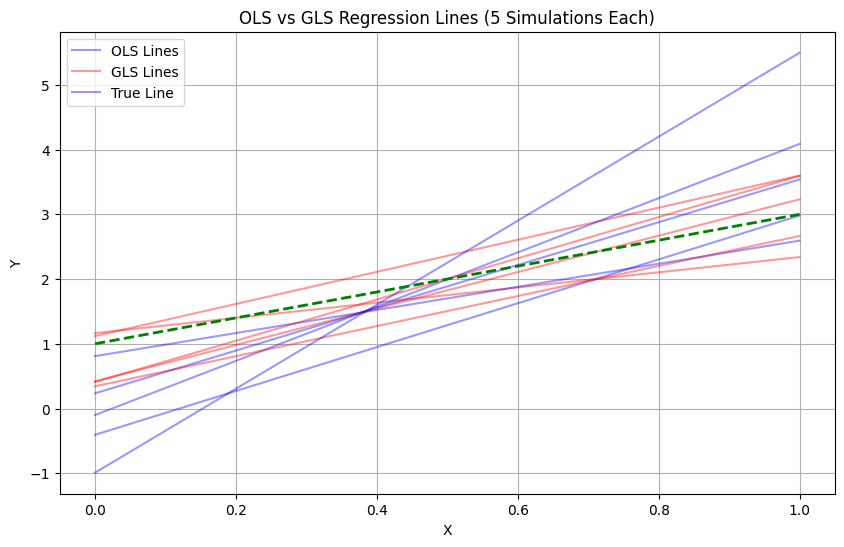

Omega (Covariance matrix of the errors):
[[  1.           0.           0.         ...   0.           0.
    0.        ]
 [  0.           1.19008264   0.         ...   0.           0.
    0.        ]
 [  0.           0.           1.39669421 ...   0.           0.
    0.        ]
 ...
 [  0.           0.           0.         ...  96.39669421   0.
    0.        ]
 [  0.           0.           0.         ...   0.          98.19008264
    0.        ]
 [  0.           0.           0.         ...   0.           0.
  100.        ]]

Omega^-1 (Inverse of the covariance matrix):
[[1.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.84027778 0.         ... 0.         0.         0.        ]
 [0.         0.         0.71597633 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.0103738  0.         0.        ]
 [0.         0.         0.         ... 0.         0.01018433 0.        ]
 [0.         0.         0.         ... 0.         0.   

In [ ]:
# Parameters for simulation
np.random.seed(16)
n = 100  # Number of observations
k = 1    # Number of regressors (excluding the intercept)

# Generate random independent variable
X_raw = np.random.rand(n, k)
X = np.hstack([np.ones((n, 1)), X_raw])  # Add intercept column (ones)

# True coefficients (intercept and slope)
beta_true = np.array([1, 2])

# Generate heteroscedastic errors
heteroscedasticity = np.linspace(1, 10, n)
epsilon = heteroscedasticity * np.random.randn(n)

# Simulate dependent variable
Y = X @ beta_true + epsilon

# Simulate a covariance matrix Omega (we'll assume it's diagonal here)
Omega = np.diag(heteroscedasticity**2)  # Covariance matrix of the errors
Omega_inv = np.linalg.inv(Omega)

# --- Plot OLS and GLS Regression Lines ---
plt.figure(figsize=(10, 6))

n_simulations = 5  # Number of simulations for OLS and GLS lines
X_vals = np.linspace(0, 1, n)

for _ in range(n_simulations):
    # New random errors
    epsilon_sim = heteroscedasticity * np.random.randn(n)
    Y_sim = X @ beta_true + epsilon_sim

    # OLS estimate
    b_OLS_sim = np.linalg.inv(X.T @ X) @ X.T @ Y_sim

    # GLS estimate
    b_GLS_sim = np.linalg.inv(X.T @ Omega_inv @ X) @ (X.T @ Omega_inv @ Y_sim)

    # Plot OLS line
    Y_ols_line = b_OLS_sim[0] + b_OLS_sim[1] * X_vals
    plt.plot(X_vals, Y_ols_line, label='OLS Line', color='blue', alpha=0.4)

    # Plot GLS line
    Y_gls_line = b_GLS_sim[0] + b_GLS_sim[1] * X_vals
    plt.plot(X_vals, Y_gls_line, label='GLS Line', color='red', alpha=0.4)

# Plot the true regression line
Y_true_line = beta_true[0] + beta_true[1] * X_vals
plt.plot(X_vals, Y_true_line, label='True Line', color='green', linestyle='--', linewidth=2)

plt.title('OLS vs GLS Regression Lines (5 Simulations Each)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(['OLS Lines', 'GLS Lines', 'True Line'], loc='best')
plt.grid(True)
plt.show()


# Print Omega (covariance matrix of the errors)
print("Omega (Covariance matrix of the errors):")
print(Omega)

# Print Omega^-1 (inverse of the covariance matrix)
print("\nOmega^-1 (Inverse of the covariance matrix):")
print(Omega_inv)

##Weighted Least Squares

The above is often referred to as **Weighted Least Squares**. Note that with real data we would likely need to estimate $\Omega.$

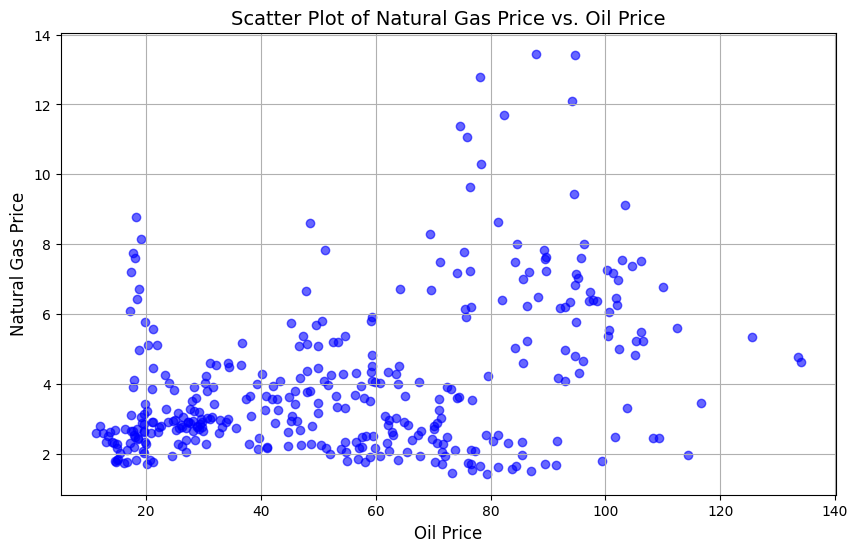

In [ ]:
# Load the CSV file into a pandas DataFrame
df_gas = pd.read_csv('oil gas price.csv')

# Convert 'month' to datetime format, 'month' is in 'MMM-YY' format (e.g., 'Jan-00')
# Use `errors='coerce'` to handle any invalid dates
df_gas['month'] = pd.to_datetime(df_gas['month'], format='%b-%y', errors='coerce')

# Scatter plot with oil_price on the x-axis and ng_price on the y-axis
plt.figure(figsize=(10, 6))
plt.scatter(df_gas['oil_price'], df_gas['ng_price'], color='blue', alpha=0.6)

# Add labels and title
plt.xlabel('Oil Price', fontsize=12)
plt.ylabel('Natural Gas Price', fontsize=12)
plt.title('Scatter Plot of Natural Gas Price vs. Oil Price', fontsize=14)

# Show the plot
plt.grid(True)
plt.show()

In [ ]:
# Define the dependent variable (natural gas price)
y = df_gas['ng_price']

# Define the independent variable (oil price)
X = df_gas[['oil_price']]

# Add a constant (intercept) to the independent variable
X = sm.add_constant(X)

# Initial OLS fit
ols_model = sm.OLS(y, X).fit()
ols_resid = ols_model.resid

# Step 2: Estimate initial autocorrelation (AR(1))
resid_fit = sm.OLS(ols_resid[1:].reset_index(drop=True), sm.add_constant(ols_resid[:-1].reset_index(drop=True))).fit() # Reset index to ensure alignment between the dependent and independent variables
rho = resid_fit.params[0]

# For simplicity, we assume the variance is proportional to the log magnitude of the residuals
residual_variance = np.log(np.abs(ols_resid))

# Cap the autocorrelation coefficient more aggressively
rho = min(rho, 1)  # Capping for more stability if needed

# Normalize residuals to avoid overly large covariance values
residual_variance = residual_variance / np.max(residual_variance)

# Construct initial covariance matrix (Omega) with both heteroscedasticity and autocorrelation
n = len(ols_resid)
sigma = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        sigma[i, j] = residual_variance[i] * residual_variance[j] * (rho ** abs(i - j))

# Step 3: Fit GLS model using the estimated covariance matrix
gls_model = sm.GLS(y, X, sigma=sigma)
gls_results = gls_model.fit()

#Step 4: Iterate to refine estimates of rho and heteroscedasticity
#for _ in range(5):  # Iterate a few times to refine
#    ols_resid = gls_results.resid

    # Estimate autocorrelation (AR(1)) again
#    resid_fit = sm.OLS(ols_resid[1:].reset_index(drop=True), sm.add_constant(ols_resid[:-1].reset_index(drop=True))).fit() # Reset index to ensure alignment between the dependent and independent variables
#    rho = resid_fit.params[0]

    # Update heteroscedasticity estimation (variance proportional to new residuals)
#    residual_variance = np.log(np.abs(ols_resid))

    # Cap the autocorrelation coefficient more aggressively
#    rho = min(rho, 1)  # Capping for more stability if needed

    # Normalize residuals to avoid overly large covariance values
#    residual_variance = residual_variance / np.max(residual_variance)

    # Update the covariance matrix (Omega) with both heteroscedasticity and autocorrelation
#    for i in range(n):
#        for j in range(n):
#            sigma[i, j] = residual_variance[i] * residual_variance[j] * (rho ** abs(i - j))

    # Re-fit the GLS model with updated Omega
#    gls_model = sm.GLS(y, X, sigma=sigma)
#    gls_results = gls_model.fit()


# Print final GLS results (adjusted for both heteroscedasticity and autocorrelation)
print(gls_results.summary())

print(ols_model.summary())


                            GLS Regression Results                            
Dep. Variable:               ng_price   R-squared:                       0.657
Model:                            GLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     693.5
Date:                Tue, 24 Sep 2024   Prob (F-statistic):           3.91e-86
Time:                        13:26:27   Log-Likelihood:                -1163.0
No. Observations:                 364   AIC:                             2330.
Df Residuals:                     362   BIC:                             2338.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3418      0.029     46.925      0.0

Autocorrelation coefficient (rho): 0.9468854935714854
